<a href="https://colab.research.google.com/github/HusamAlzain/ML_Portfolio/blob/main/NLP_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


#Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


#Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Wrangling

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Womens Clothing E-Commerce Reviews.csv')

In [5]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [6]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [7]:
df_copy=df.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Rating'
       ,'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], axis=1)

In [8]:
df_copy.isna().sum()

Review Text        845
Recommended IND      0
dtype: int64

In [9]:
df_copy.dropna(inplace=True)

In [10]:
df_copy.isna().sum()

Review Text        0
Recommended IND    0
dtype: int64

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [11]:
df_copy['Recommended IND'].value_counts()

1    18540
0     4101
Name: Recommended IND, dtype: int64

In [12]:
df.value_counts('Recommended IND', normalize=True)

Recommended IND
1    0.822362
0    0.177638
dtype: float64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [13]:
df_copy

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


In [14]:
pd.set_option('display.max_colwidth', None)


In [15]:
df_copy = df_copy.rename(columns={"Recommended IND": "target", "Review Text": "text"})
df_copy.head(30)

,text,target
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",0
6,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",1
7,"I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",1
8,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,1
9,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",1


---
---


### Missing Value Detection

In [16]:
df_copy.duplicated().sum()

7

In [17]:
df_copy.drop_duplicates(inplace=True)

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [18]:
stop_words = set(stopwords.words('english'))

words_to_exclude = {"no", "not"}

stop_words.difference_update(words_to_exclude)

In [19]:
def cleaning(data):

    import re

    #1. Removing URLS
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()

    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #5. Tokenize
    text_tokens = word_tokenize(data.lower())

    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]


    #9. joining
    return " ".join( text_cleaned)

In [20]:
cleaning_text = pd.DataFrame(df_copy["text"].apply(cleaning))

In [21]:
df_copy['text_cleaned'] = cleaning_text['text']


In [22]:
df_copy

,text,target,text_cleaned
0,Absolutely wonderful - silky and sexy and comfortable,1,absolutely wonderful silky sexy comfortable
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt
...,...,...,...
23481,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,1,happy snag dress great price easy slip flattering cut color combo
23482,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok.",1,reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve not maybe others ok
23483,"This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",0,fit well top see never would worked im glad able try store didnt order online different fabric would great
23484,"I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!",1,bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might not worth side note dress delivered nordstrom tag found much cheaper looking


In [23]:
df_copy.head(20)

,text,target,text_cleaned
0,Absolutely wonderful - silky and sexy and comfortable,1,absolutely wonderful silky sexy comfortable
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",0,love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress
6,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",1,aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops
7,"I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest

In [24]:
#we will remove duplictes like grrrrrr

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [25]:
df_copy

,text,target,text_cleaned
0,Absolutely wonderful - silky and sexy and comfortable,1,absolutely wonderful silky sexy comfortable
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt
...,...,...,...
23481,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,1,happy snag dress great price easy slip flattering cut color combo
23482,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok.",1,reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve not maybe others ok
23483,"This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",0,fit well top see never would worked im glad able try store didnt order online different fabric would great
23484,"I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!",1,bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might not worth side note dress delivered nordstrom tag found much cheaper looking


In [26]:
class_positive=df_copy[df_copy['target']==1]['text_cleaned']
class_negative=df_copy[df_copy['target']==0]['text_cleaned']


In [27]:
class_negative

2        high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
5                                      love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress
10                                                                                                                   dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back
22                                                            fi

### Collect Words (positive and negative separately)

In [28]:
positive_w=" ".join(class_positive)

In [29]:
nigative_w=" ".join(class_negative)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [30]:
from wordcloud import WordCloud


In [31]:
worldcloud_p= WordCloud(background_color="white", max_words =250)


In [32]:
worldcloud_p.generate(positive_w)


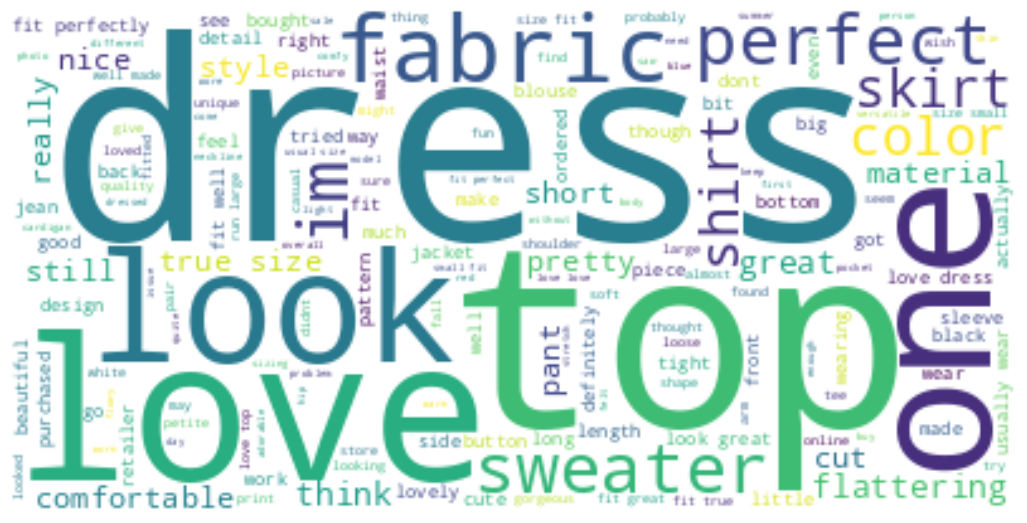

In [33]:
import matplotlib.pyplot as plt # The matplotlib library is used for visualization purposes
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_p, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
worldcloud_n= WordCloud(background_color="white", max_words =250)


In [35]:
worldcloud_n.generate(nigative_w)


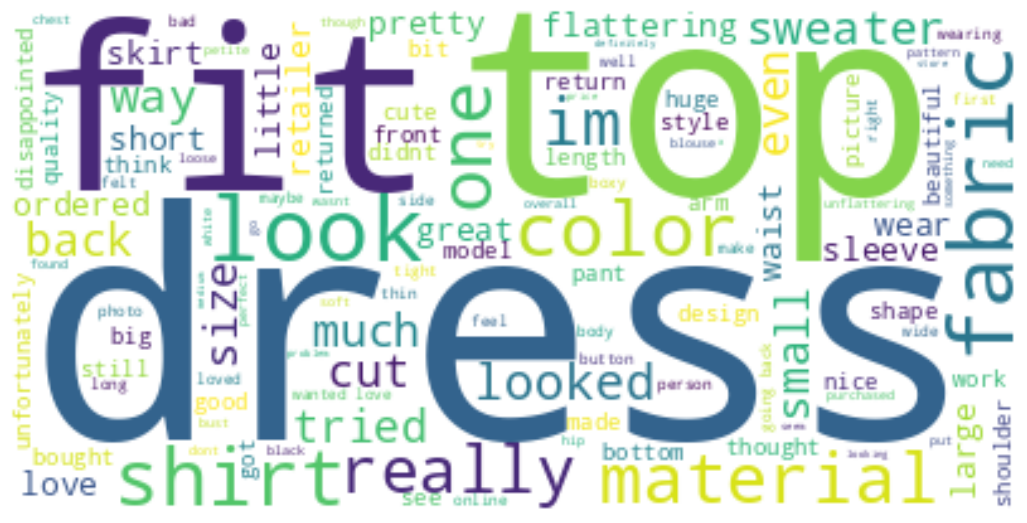

In [36]:
import matplotlib.pyplot as plt # The matplotlib library is used for visualization purposes
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_n, interpolation="bilinear")
plt.axis("off")
plt.show()

In [37]:
#search how to get more insights from world clould to improve your models

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df_copy["text"].values
y = df_copy["target"].map({0:1, 1:0}).values

In [40]:
from sklearn.utils import class_weight
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
vectorizer = CountVectorizer(preprocessor=cleaning,max_df = 0.90) # ngram_range=(1,3), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

### TF-IDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [45]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessorizing,accessory,...,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
18103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
18104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159766,0.0,0.0,0.0,0.0
18105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Eval Function

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [48]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))


### Define Scoring

In [49]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["0"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["0"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["0"])}

## Logistic Regression

### CountVectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initialize the model
LR = LogisticRegression()

# Fit the model
LR.fit(X_train_count, y_train)

LogisticRegression()

In [ ]:
# Evaluate the model
eval(LR, X_train_count, X_test_count)

[[ 515  305]
 [ 233 3474]]
Test_Set
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       820
           1       0.92      0.94      0.93      3707

    accuracy                           0.88      4527
   macro avg       0.80      0.78      0.79      4527
weighted avg       0.88      0.88      0.88      4527

Train_Set
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      3280
           1       0.96      0.98      0.97     14827

    accuracy                           0.95     18107
   macro avg       0.94      0.90      0.91     18107
weighted avg       0.95      0.95      0.95     18107



In [ ]:
scores = cross_validate(LR, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.887226
train_accuracy         0.953032
test_precision-neg     0.724546
train_precision-neg    0.916185
test_recall-neg        0.609756
train_recall-neg       0.815312
test_f1-neg            0.661959
train_f1-neg           0.862806
dtype: float64

### TF-IDF

In [ ]:
# Initialize the model
LR_tf = LogisticRegression()

# Fit the model
LR_tf.fit(X_train_tf_idf, y_train)

LogisticRegression()

In [ ]:
# Evaluate the model
eval(LR_tf, X_train_tf_idf, X_test_tf_idf)

[[ 444  376]
 [ 134 3573]]
Test_Set
              precision    recall  f1-score   support

           0       0.77      0.54      0.64       820
           1       0.90      0.96      0.93      3707

    accuracy                           0.89      4527
   macro avg       0.84      0.75      0.78      4527
weighted avg       0.88      0.89      0.88      4527

Train_Set
              precision    recall  f1-score   support

           0       0.86      0.60      0.71      3280
           1       0.92      0.98      0.95     14827

    accuracy                           0.91     18107
   macro avg       0.89      0.79      0.83     18107
weighted avg       0.91      0.91      0.90     18107



In [ ]:
scores = cross_validate(LR_tf, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.887226
train_accuracy         0.953032
test_precision-neg     0.724546
train_precision-neg    0.916185
test_recall-neg        0.609756
train_recall-neg       0.815312
test_f1-neg            0.661959
train_f1-neg           0.862806
dtype: float64

## Naive Bayes

### Countvectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Initialize the model
nb = MultinomialNB()

# Fit the model
nb.fit(X_train_count,y_train)

MultinomialNB()

In [ ]:
# Evaluate the model
eval(nb, X_train_count, X_test_count)

[[ 552  268]
 [ 239 3468]]
Test_Set
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       820
           1       0.93      0.94      0.93      3707

    accuracy                           0.89      4527
   macro avg       0.81      0.80      0.81      4527
weighted avg       0.89      0.89      0.89      4527

Train_Set
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      3280
           1       0.95      0.94      0.95     14827

    accuracy                           0.91     18107
   macro avg       0.85      0.86      0.86     18107
weighted avg       0.92      0.91      0.91     18107



In [ ]:
scores = cross_validate(nb, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.885735
train_accuracy         0.915103
test_precision-neg     0.680630
train_precision-neg    0.758525
test_recall-neg        0.698476
train_recall-neg       0.779505
test_f1-neg            0.689145
train_f1-neg           0.768866
dtype: float64

### TF-IDF

In [ ]:
# Initialize the model
nb_tf = MultinomialNB()

# Fit the model
nb_tf.fit(X_train_tf_idf, y_train)

MultinomialNB()

In [ ]:
# Evaluate the model
eval(nb_tf, X_train_tf_idf, X_test_tf_idf)

[[ 138  682]
 [  23 3684]]
Test_Set
              precision    recall  f1-score   support

           0       0.86      0.17      0.28       820
           1       0.84      0.99      0.91      3707

    accuracy                           0.84      4527
   macro avg       0.85      0.58      0.60      4527
weighted avg       0.85      0.84      0.80      4527

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.25      0.39      3280
           1       0.86      1.00      0.92     14827

    accuracy                           0.86     18107
   macro avg       0.90      0.62      0.66     18107
weighted avg       0.87      0.86      0.83     18107



In [ ]:
scores = cross_validate(nb_tf, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.885735
train_accuracy         0.915103
test_precision-neg     0.680630
train_precision-neg    0.758525
test_recall-neg        0.698476
train_recall-neg       0.779505
test_f1-neg            0.689145
train_f1-neg           0.768866
dtype: float64

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC()

# Fit the model
svm.fit(X_train_count, y_train)

SVC()

In [ ]:
# Evaluate the model
eval(svm, X_train_count, X_test_count)

[[ 440  380]
 [ 128 3579]]
Test_Set
              precision    recall  f1-score   support

           0       0.77      0.54      0.63       820
           1       0.90      0.97      0.93      3707

    accuracy                           0.89      4527
   macro avg       0.84      0.75      0.78      4527
weighted avg       0.88      0.89      0.88      4527

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3280
           1       0.97      0.99      0.98     14827

    accuracy                           0.97     18107
   macro avg       0.97      0.92      0.94     18107
weighted avg       0.97      0.97      0.97     18107



In [ ]:
scores = cross_validate(svm, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.889987
train_accuracy         0.967747
test_precision-neg     0.797952
train_precision-neg    0.962068
test_recall-neg        0.526220
train_recall-neg       0.855691
test_f1-neg            0.633882
train_f1-neg           0.905764
dtype: float64

### TD-IDF

In [ ]:
# Initialize the model
svm_tf = SVC()

# Fit the model
svm_tf.fit(X_train_tf_idf, y_train)

SVC()

In [ ]:
# Evaluate the model
eval(svm_tf, X_train_tf_idf, X_test_tf_idf)

[[ 466  354]
 [ 138 3569]]
Test_Set
              precision    recall  f1-score   support

           0       0.77      0.57      0.65       820
           1       0.91      0.96      0.94      3707

    accuracy                           0.89      4527
   macro avg       0.84      0.77      0.80      4527
weighted avg       0.88      0.89      0.88      4527

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3280
           1       0.98      1.00      0.99     14827

    accuracy                           0.98     18107
   macro avg       0.98      0.95      0.96     18107
weighted avg       0.98      0.98      0.98     18107



In [ ]:
scores = cross_validate(svm_tf, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.889987
train_accuracy         0.967747
test_precision-neg     0.797952
train_precision-neg    0.962068
test_recall-neg        0.526220
train_recall-neg       0.855691
test_f1-neg            0.633882
train_f1-neg           0.905764
dtype: float64

## Random Forest

### Countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize the model
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train_count, y_train)

RandomForestClassifier()

In [ ]:
# Evaluate the model
eval(rf, X_train_count, X_test_count)

[[ 198  622]
 [  31 3676]]
Test_Set
              precision    recall  f1-score   support

           0       0.86      0.24      0.38       820
           1       0.86      0.99      0.92      3707

    accuracy                           0.86      4527
   macro avg       0.86      0.62      0.65      4527
weighted avg       0.86      0.86      0.82      4527

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3280
           1       1.00      1.00      1.00     14827

    accuracy                           1.00     18107
   macro avg       1.00      1.00      1.00     18107
weighted avg       1.00      1.00      1.00     18107



In [ ]:
scores = cross_validate(rf, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

KeyboardInterrupt: ignored

### TF-IDF

In [ ]:
# Initialize the model
rf_tf = RandomForestClassifier()

# Fit the model
rf_tf.fit(X_train_tf_idf, y_train)

RandomForestClassifier()

In [ ]:
# Evaluate the model
eval(rf_tf, X_train_tf_idf, X_test_tf_idf)

[[ 209  611]
 [  38 3669]]
Test_Set
              precision    recall  f1-score   support

           0       0.85      0.25      0.39       820
           1       0.86      0.99      0.92      3707

    accuracy                           0.86      4527
   macro avg       0.85      0.62      0.66      4527
weighted avg       0.86      0.86      0.82      4527

Train_Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3280
           1       1.00      1.00      1.00     14827

    accuracy                           1.00     18107
   macro avg       1.00      1.00      1.00     18107
weighted avg       1.00      1.00      1.00     18107



In [ ]:
scores = cross_validate(rf_tf, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.853703
train_accuracy         1.000000
test_precision-neg     0.877474
train_precision-neg    1.000000
test_recall-neg        0.224085
train_recall-neg       1.000000
test_f1-neg            0.356420
train_f1-neg           1.000000
dtype: float64

## Ada Boosting

### Countvectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Initialize the model
ada = AdaBoostClassifier()

# Fit the model
ada.fit(X_train_count, y_train)

AdaBoostClassifier()

In [ ]:
# Evaluate the model
eval(ada, X_train_count, X_test_count)

[[ 360  460]
 [ 174 3533]]
Test_Set
              precision    recall  f1-score   support

           0       0.67      0.44      0.53       820
           1       0.88      0.95      0.92      3707

    accuracy                           0.86      4527
   macro avg       0.78      0.70      0.72      4527
weighted avg       0.85      0.86      0.85      4527

Train_Set
              precision    recall  f1-score   support

           0       0.68      0.44      0.53      3280
           1       0.88      0.95      0.92     14827

    accuracy                           0.86     18107
   macro avg       0.78      0.70      0.72     18107
weighted avg       0.85      0.86      0.85     18107



In [ ]:
scores = cross_validate(ada, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.859502
train_accuracy         0.863184
test_precision-neg     0.673952
train_precision-neg    0.689191
test_recall-neg        0.435366
train_recall-neg       0.445766
test_f1-neg            0.528719
train_f1-neg           0.541358
dtype: float64

### TF-IDF

In [ ]:
# Initialize the model
ada_tf = AdaBoostClassifier()

# Fit the model
ada_tf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier()

In [ ]:
# Evaluate the model
eval(ada_tf, X_train_tf_idf, X_test_tf_idf)

[[ 371  449]
 [ 189 3518]]
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.45      0.54       820
           1       0.89      0.95      0.92      3707

    accuracy                           0.86      4527
   macro avg       0.77      0.70      0.73      4527
weighted avg       0.85      0.86      0.85      4527

Train_Set
              precision    recall  f1-score   support

           0       0.71      0.46      0.56      3280
           1       0.89      0.96      0.92     14827

    accuracy                           0.87     18107
   macro avg       0.80      0.71      0.74     18107
weighted avg       0.86      0.87      0.86     18107



In [ ]:
scores = cross_validate(ada_tf, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.859502
train_accuracy         0.863184
test_precision-neg     0.673952
train_precision-neg    0.689191
test_recall-neg        0.435366
train_recall-neg       0.445766
test_f1-neg            0.528719
train_f1-neg           0.541358
dtype: float64

## DL modeling

### Tokenization

In [150]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i

In [152]:
from tensorflow.keras.preprocessing.text import Tokenizer

# How many words consider
num_words = 15001
tokenizer = Tokenizer(num_words=num_words)

In [153]:
tokenizer.fit_on_texts(X)

### Creating word index

In [154]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [155]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [156]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [157]:
print("Before conversion: ", X[:2])

Before conversion:  ['Absolutely wonderful - silky and sexy and comfortable'
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.']


In [158]:
print("After conversion: ", X_num_tokens[:2])

After conversion:  [[253, 532, 917, 3, 662, 3, 68], [21, 7, 18, 33, 1712, 99, 2, 1321, 8, 221, 5, 9, 4, 106, 3, 36, 314, 2, 131, 1243, 2, 429, 41, 24, 52, 5, 136, 1243, 33, 95, 2, 72, 4, 95, 3, 38, 501, 2, 21, 1, 86, 11, 31, 416, 39, 4, 53, 453, 1, 392, 41, 155, 29, 4, 130, 1372, 11, 438, 439, 6, 772, 95]]


### Maximum number of tokens for all documents¶

In [159]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [160]:
num_tokens

array([ 7, 62, 97, ..., 42, 85, 19])

In [161]:
num_tokens.min()

2

In [162]:
num_tokens.mean()

60.60934876734117

In [163]:
num_tokens.max()

116

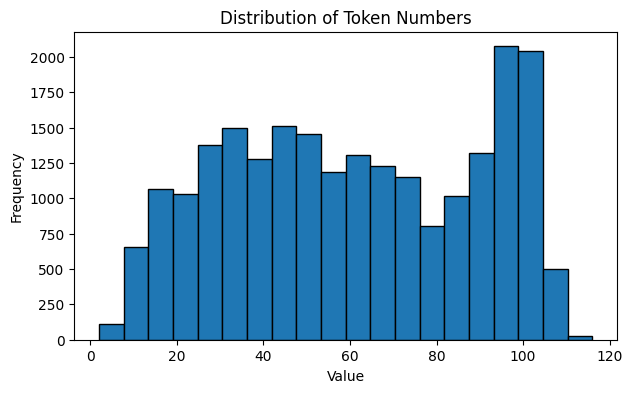

In [164]:
# Plot a histogram to visualize the distribution
plt.hist(num_tokens, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [177]:
max_tokens = 110

In [178]:
sum(num_tokens <= max_tokens) / len(num_tokens)

0.9987629230361403

In [179]:
sum(num_tokens <= max_tokens)

22606

In [180]:
len(num_tokens)

22634

### Fixing token counts of all documents (pad_sequences)

In [181]:
from keras.preprocessing.sequence import pad_sequences

In [182]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

In [183]:
X_pad.shape

(22634, 110)

In [184]:
X_num_tokens[801]

[2,
 21,
 7,
 2652,
 1,
 280,
 3,
 613,
 142,
 2126,
 146,
 1,
 123,
 128,
 68,
 3,
 21,
 20,
 5,
 89,
 304,
 4,
 907,
 7,
 56,
 19,
 176,
 63,
 505,
 2,
 38,
 603,
 3,
 743,
 164,
 3,
 1,
 180,
 78,
 54,
 1,
 86,
 585,
 350,
 17,
 392,
 16,
 252,
 1061,
 2,
 55,
 29,
 141,
 576,
 37,
 5807,
 273]

In [185]:
len(X_num_tokens[801])

57

In [186]:
# Location of the longest document
np.argmax(num_tokens)

16258

### Train Set Split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, random_state=42, stratify=y)

### Modeling

In [188]:
from keras.models import Sequential
model = Sequential()

In [189]:
embedding_size = 50

In [190]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)

In [191]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Embedding, GRU

model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))


model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12, return_sequences=False))

model.add(Dense(1, activation='sigmoid'))

In [192]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience = 2,
                           restore_best_weights=True)

In [193]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61061151, 2.7601626 ])

In [194]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [195]:
model.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
160/160 [==============================] - 48s 256ms/step - loss: 0.4793 - recall: 0.8084 - val_loss: 0.3484 - val_recall: 0.8976
Epoch 2/10
160/160 [==============================] - 39s 243ms/step - loss: 0.2884 - recall: 0.9125 - val_loss: 0.3301 - val_recall: 0.8854
Epoch 3/10
160/160 [==============================] - 43s 272ms/step - loss: 0.2351 - recall: 0.9374 - val_loss: 0.3213 - val_recall: 0.8317
Epoch 3: early stopping


### Model Evaluation

In [196]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.479293,0.808401,0.348405,0.897561
1,0.288408,0.912466,0.330115,0.885366
2,0.235144,0.937398,0.321285,0.831707


<Axes: >

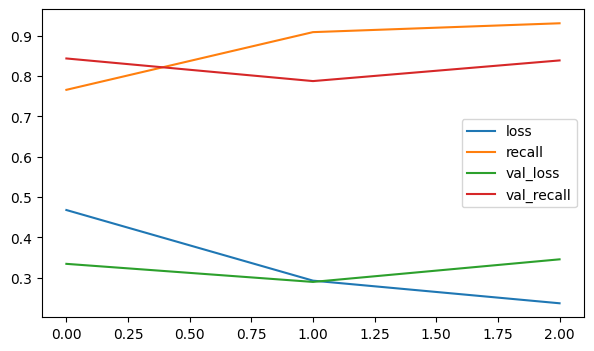

In [84]:
model_loss.plot()

In [197]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 4s 41ms/step
[[1584  270]
 [  42  368]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1854
           1       0.58      0.90      0.70       410

    accuracy                           0.86      2264
   macro avg       0.78      0.88      0.81      2264
weighted avg       0.90      0.86      0.87      2264



In [198]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 19s 30ms/step
[[14381  2299]
 [  257  3433]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     16680
           1       0.60      0.93      0.73      3690

    accuracy                           0.87     20370
   macro avg       0.79      0.90      0.82     20370
weighted avg       0.91      0.87      0.88     20370



71/71 [==============================] - 1s 18ms/step


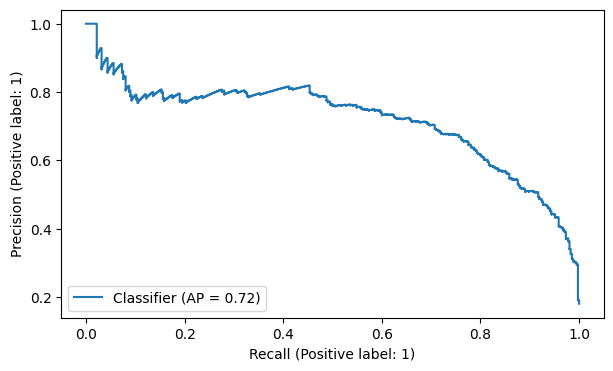

In [87]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)


In [88]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7196229932101603

In [89]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [50]:
!pip install transformers

### Read Data

In [51]:
df2 = df.copy()

In [52]:
df2.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


Renaming the columns

In [53]:
# Renaming columns from "Recommended IND" to "Recommended", and "Review text" to "Review"
df2 = df2.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})

In [54]:
df2.head()

,Unnamed: 0,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [55]:
df2.dropna(inplace=True)

In [56]:
df2.duplicated().sum()

0

### Train test split

In [57]:
X = df2["Review"].values
y = df2["Recommended"].map({0:1, 1:0}).values

In [58]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

### Tokenization

In [59]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [60]:
print(len(tokenizer.vocab))

28996


In [61]:
tokenizer2 = BertTokenizer.from_pretrained('bert-base-uncased')

In [62]:
print(len(tokenizer2.vocab))

30522


### Fixing token counts of all documents

In [63]:
X

array(['I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",
       'This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store

We need to make sure that we don't have any None values, otherwise we will get an error.

In [64]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  162


In [65]:
np.array(num_of_sent_tokens).mean()

79.16580205472485

In [66]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

In [67]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=101)

In [68]:
all_sentence_tokens = tokenizer(list(X),
                                max_length=162,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)

In [69]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 1045, 2018, ...,    0,    0,    0],
       [ 101, 1045, 2293, ...,    0,    0,    0],
       [ 101, 2023, 3797, ...,    0,    0,    0],
       ...,
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [70]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [71]:
all_sentence_tokens = tokenizer(list(X),
                                max_length=162,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)

In [72]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 1045, 2018, ...,    0,    0,    0],
       [ 101, 1045, 2293, ...,    0,    0,    0],
       [ 101, 2023, 3797, ...,    0,    0,    0],
       ...,
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [73]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

### Transformation Vectors to Matrices

In [74]:
def transformation(X):
  seq_len = 24

  Xids = []
  Xmask = []


  for text in X:

      tokens = tokenizer2.encode_plus(text, max_length=seq_len, truncation=True,      # we use tokenizer2 for uncased
                                      padding='max_length', add_special_tokens=True)

      Xids.append(tokens['input_ids'])
      Xmask.append(tokens['attention_mask'])


  return np.array(Xids), np.array(Xmask)

In [75]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [76]:
Xids_train

array([[  101,  1045,  4156, ..., 14464,  2000,   102],
       [  101,  2293,  2023, ...,  1037,  3543,   102],
       [  101,  1045,  2428, ...,  1996,  4338,   102],
       ...,
       [  101,  1996,  3797, ...,  2043,  1045,   102],
       [  101,  2023, 14329, ...,  2288,  2019,   102],
       [  101,  1045,  2288, ...,  1996,  2060,   102]])

In [77]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (17695, 24)
Xmask_train.shape : (17695, 24)
Xids_test.shape   : (1967, 24)
Xmask_test.shape  : (1967, 24)


In [78]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [79]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [80]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(24,), dtype=tf.int64, name=None), TensorSpec(shape=(24,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [81]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(24,), dtype=tf.int64, name=None), TensorSpec(shape=(24,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [82]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [83]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [84]:
print(dataset_train)
print("-------------------")
print(dataset_test)

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(24,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(24,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>
-------------------
<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(24,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(24,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>


### Batch Size

In [85]:
batch_size = 16

# The developers who developed the BERT model recommend using batch sizes of 16 and 32.

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

# We determine in how many batches we will feed the grouped tensors obtained above to the model. We do this using the batch() function.
# We want the model to be fed in batches of 32. We apply this to both the train and test data.

In [86]:
train_ds

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 24), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 24), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [87]:
!pip install -q tf-models-official

In [88]:
len(X_train)

18107

In [89]:
len(X_train)/16

1131.6875

In [90]:
print(len(train_ds))
print(len(train_ds)*3)
print(int(0.1*len(train_ds)*3))

1106
3318
331


### Creating optimization

In [91]:
from official.nlp import optimization
epochs = 3
#batch_size = 16
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

### Creating Model with TPU

In [119]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(24,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(24,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

    x = Dense(86, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.2, name="dropout")(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [120]:
strategy = tf.distribute.MirroredStrategy()
from tensorflow.keras.initializers import Zeros as ZerosInitializer

with strategy.scope():

  #from tensorflow.keras.optimizers import Adam
  # from tensorflow.keras.losses import BinaryCrossentropy
  # from tensorflow.keras.metrics import Recall
  optimizer = 'adam'
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics="Recall")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [121]:
model3.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 24)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 24)]                 0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 24, 76                                     

### Model Fiting

In [ ]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/2
596/596 [==============================] - 242s 202ms/step - loss: 0.5538 - recall: 0.8445 - val_loss: 0.4709 - val_recall: 0.9028
Epoch 2/2
596/596 [==============================] - 63s 106ms/step - loss: 0.4421 - recall: 0.9097 - val_loss: 0.3813 - val_recall: 0.8824


## Model evaluation

In [ ]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.553777,0.844451,0.470890,0.902813
1,0.442076,0.909736,0.381258,0.882353


<Axes: >

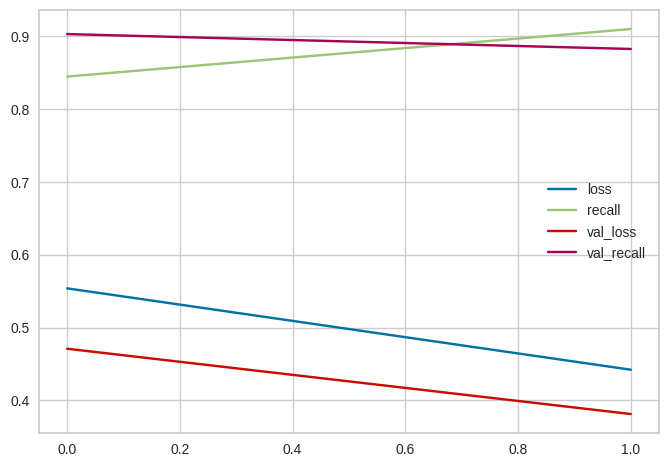

In [ ]:
model_loss.plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

67/67 [==============================] - 16s 164ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1727
           1       0.81      0.88      0.84       391

    accuracy                           0.94      2118
   macro avg       0.89      0.92      0.90      2118
weighted avg       0.94      0.94      0.94      2118



In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred))

596/596 [==============================] - 22s 35ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     15534
           1       0.89      0.92      0.91      3523

    accuracy                           0.97     19057
   macro avg       0.94      0.95      0.94     19057
weighted avg       0.97      0.97      0.97     19057



67/67 [==============================] - 3s 27ms/step


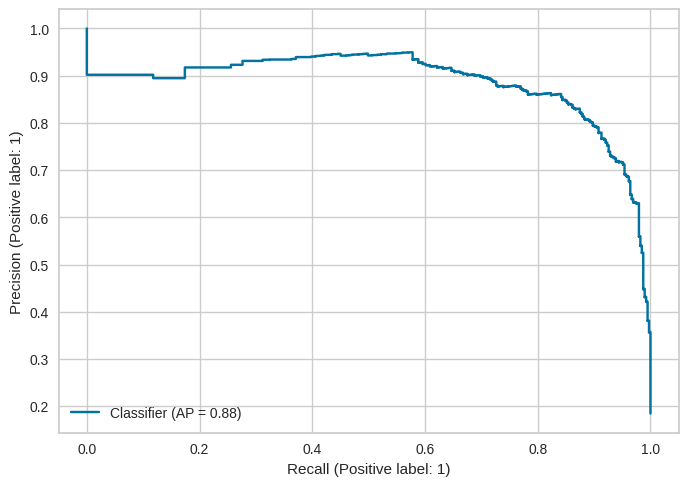

In [ ]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
average_precision_score(y_test2, y_pred_proba)

0.8842455381453453

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___